In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crash=pd.read_csv('crashtraffic.csv')

In [3]:
crash

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Y Cooordinate,STATION,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,855385.499846,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,853612.562628,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,855354.687686,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,853458.807973,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,854228.434641,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742,2022-01-20,8:28 AM,Non-fatal injury,Possible Injury (C),2,0,0,Rear-end,V1: Slowing or stopped in traffic / V2: Slowin...,V1: E / V2: E,...,853745.250000,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.321158,41.933919
21743,2022-01-20,11:26 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Front to Rear,V1: Parked / V2: Turning right,V1: U / V2: N,...,854442.236402,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.302562,41.940164
21744,2022-01-20,1:58 PM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Rear-end,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W,...,853707.812300,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.323528,41.933586
21745,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,854014.625000,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284


In [4]:
crash = crash.loc[crash['X Cooordinate'] * crash['Y Cooordinate'] != 0]
crash

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Y Cooordinate,STATION,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,855385.499846,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,853612.562628,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,855354.687686,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,853458.807973,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,854228.434641,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742,2022-01-20,8:28 AM,Non-fatal injury,Possible Injury (C),2,0,0,Rear-end,V1: Slowing or stopped in traffic / V2: Slowin...,V1: E / V2: E,...,853745.250000,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.321158,41.933919
21743,2022-01-20,11:26 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Front to Rear,V1: Parked / V2: Turning right,V1: U / V2: N,...,854442.236402,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.302562,41.940164
21744,2022-01-20,1:58 PM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Rear-end,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W,...,853707.812300,NaN,NaN,NaN,NaN,NaN,NaN,False,-71.323528,41.933586
21745,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,854014.625000,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284


In [5]:
crash=crash.dropna()

In [6]:
final=crash.iloc[:,[22,23]]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(final)
data_normalized=scaler.transform(final)
data_normalized=pd.DataFrame(data=data_normalized,index=final.index,columns=final.columns)
print(data_normalized.describe().round(3))

               X          Y
count  19545.000  19545.000
mean      -0.000      0.000
std        1.000      1.000
min       -1.823     -6.117
25%       -1.136     -0.772
50%        0.295      0.153
75%        0.810      0.726
max        5.169     15.633


In [8]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=654)
model.fit(data_normalized)
labels=model.predict(data_normalized)

In [9]:
final2=final.assign(Cluster=labels)
grouped=final2.groupby(['Cluster'])

grouped.agg({
    'X':'mean',
    'Y':'mean',
}).round(6)

,X,Y
Cluster,,
0,-71.296803,41.930196
1,-71.357645,41.911096
2,-71.283057,41.950758


<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

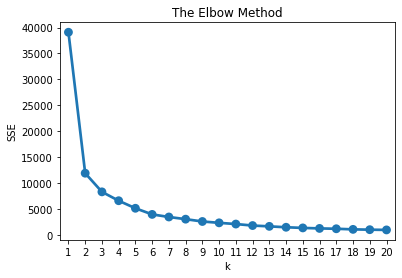

In [10]:
%matplotlib inline
sse={}
for k in range (1,21):
    kmeans=KMeans(n_clusters=k,random_state=654)
    kmeans.fit(data_normalized)
    sse[k]=kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [11]:
kmeans = KMeans(n_clusters=2, random_state=654)
kmeans.fit(data_normalized)
identified_clusters = kmeans.predict(data_normalized)
cluster_labels = kmeans.labels_

In [12]:
data_clusters=data_normalized.assign(cluster=cluster_labels)
data_clusters.groupby(['cluster']).agg({
    'X':'mean',
    'Y':['mean','count']}).round(2)

X     Y       
         mean  mean  count
cluster                   
0       -1.13 -0.99   7481
1        0.70  0.61  12064

In [13]:
data_clusters=final.assign(cluster=cluster_labels)
data_clusters.groupby(['cluster']).agg({
    'X':'mean',
    'Y':['mean','count']}).round(2)

X      Y       
          mean   mean  count
cluster                     
0       -71.36  41.91   7481
1       -71.29  41.94  12064

In [14]:
data_clusters

,X,Y,cluster
0,-71.277587,41.948610,1
1,-71.296220,41.932683,1
2,-71.277947,41.948334,1
3,-71.260316,41.931229,1
4,-71.291080,41.938218,1
...,...,...,...
21569,-71.310037,41.933970,1
21570,-71.304793,41.954814,1
21571,-71.299166,41.919310,1
21745,-71.286086,41.936284,1


In [15]:
finalcrash = crash.copy()
finalcrash['cluster'] = identified_clusters
display(finalcrash.sort_values(by='cluster'))

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,STATION,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y,cluster
21746,2022-01-23,2:57 PM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Rear-end,V1: Travelling straight ahead / V2: Slowing or...,V1: N / V2: N,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.1,26.0,10.0,True,-71.349582,41.904233,0
8530,2009-06-05,6:01 PM,Non-fatal injury,Non-fatal injury - Non-incapacitating,2,2,0,Rear-end,V1: Other / V2: Slowing or stopped in traffic,V1: W / V2: W,...,USC00198368,"NWS BOSTON NORTON, MA US",0.36,0.0,64.0,53.0,False,-71.355186,41.899032,0
8528,2009-06-05,3:25 PM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Entering traffic lane / V2: Entering traff...,V1: W / V2: N,...,USC00198368,"NWS BOSTON NORTON, MA US",0.36,0.0,64.0,53.0,False,-71.376696,41.905888,0
17091,2017-10-19,7:52 AM,Property damage only (none injured),No injury,2,0,0,Rear-end,V1: Backing / V2: Slowing or stopped in traffic,V1: W / V2: W,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.0,74.0,42.0,False,-71.357624,41.899510,0
8525,2009-06-04,3:20 PM,Property damage only (none injured),No injury,2,0,0,Rear-end,V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,USC00198368,"NWS BOSTON NORTON, MA US",0.20,0.0,76.0,54.0,False,-71.355541,41.926443,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9747,2010-08-27,12:40 AM,Non-fatal injury,Non-fatal injury - Possible,2,1,0,Rear-to-rear,V1: Travelling straight ahead / V2: Parked,V1: W / V2: W,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.0,81.0,55.0,False,-71.267560,41.939929,1
9749,2010-08-27,5:29 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,2,0,Single vehicle crash,V1: Turning left,V1: Not Reported,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.0,81.0,55.0,False,-71.281686,41.939469,1
9754,2010-08-28,4:45 PM,Property damage only (none injured),No injury,2,0,0,"Sideswipe, same direction",V1: Turning right / V2: Travelling straight ahead,V1: E / V2: E,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.0,83.0,50.0,False,-71.244650,41.954096,1
9730,2010-08-21,6:20 PM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Travelling straight ahead / V2: Backing,V1: W / V2: W,...,USC00198368,"NWS BOSTON NORTON, MA US",0.00,0.0,82.0,52.0,False,-71.278951,41.935496,1


In [16]:
    accident0 = []
    for row in finalcrash['cluster']:
        if row ==0:    accident0.append(1)
        
        else:           accident0.append(0)

In [17]:
finalcrash['accident0']=accident0
finalcrash
    

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y,cluster,accident0
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610,1,0
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683,1,0
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334,1,0
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229,1,0
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.310037,41.933970,1,0
21570,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.304793,41.954814,1,0
21571,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.299166,41.919310,1,0
21745,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284,1,0


In [18]:
X=finalcrash[['PRCP','SNOW','TMAX','TMIN']]
y=finalcrash['accident0']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=654)

In [20]:
X_train.describe()

,PRCP,SNOW,TMAX,TMIN
count,11727.000000,11727.000000,11727.000000,11727.000000
mean,0.182568,0.214062,60.266138,40.110429
std,0.449760,1.143784,18.920781,17.544067
min,0.000000,0.000000,10.000000,-10.000000
25%,0.000000,0.000000,45.000000,27.000000
50%,0.000000,0.000000,61.000000,40.000000
75%,0.130000,0.000000,76.000000,55.000000
max,4.960000,21.000000,103.000000,77.000000


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
accuracy_score(y_test,predictions)

0.6201074443591711

In [23]:
logmodel.intercept_

array([-0.42953362])

In [24]:
logmodel.coef_

array([[ 0.02436863, -0.02049574, -0.00015914, -0.00076775]])

In [25]:
pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train.columns,columns=['Coef'])

,Coef
PRCP,0.024369
SNOW,-0.020496
TMAX,-0.000159
TMIN,-0.000768


In [26]:
    accident1 = []
    for row in finalcrash['cluster']:
        if row ==1:    accident1.append(1)
        
        else:           accident1.append(0)

In [27]:
finalcrash['accident1']=accident1
finalcrash

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,PRCP,SNOW,TMAX,TMIN,Ice,X,Y,cluster,accident0,accident1
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,0.0,0.0,36.0,13.0,True,-71.277587,41.948610,1,0,1
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,0.0,0.0,39.0,19.0,True,-71.296220,41.932683,1,0,1
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,0.0,0.0,39.0,19.0,True,-71.277947,41.948334,1,0,1
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,0.0,0.0,39.0,19.0,True,-71.260316,41.931229,1,0,1
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,0.0,0.0,39.0,19.0,True,-71.291080,41.938218,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,0.0,0.0,39.0,21.0,True,-71.310037,41.933970,1,0,1
21570,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,0.0,0.0,39.0,21.0,True,-71.304793,41.954814,1,0,1
21571,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,0.0,0.0,39.0,21.0,True,-71.299166,41.919310,1,0,1
21745,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,0.0,0.1,26.0,10.0,True,-71.286086,41.936284,1,0,1


In [28]:
X=finalcrash[['PRCP','SNOW','TMAX','TMIN']]
y=finalcrash['accident1']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=654)

In [30]:
X_train.describe()

,PRCP,SNOW,TMAX,TMIN
count,11727.000000,11727.000000,11727.000000,11727.000000
mean,0.182568,0.214062,60.266138,40.110429
std,0.449760,1.143784,18.920781,17.544067
min,0.000000,0.000000,10.000000,-10.000000
25%,0.000000,0.000000,45.000000,27.000000
50%,0.000000,0.000000,61.000000,40.000000
75%,0.130000,0.000000,76.000000,55.000000
max,4.960000,21.000000,103.000000,77.000000


In [31]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
accuracy_score(y_test,predictions)

0.6201074443591711

In [32]:
logmodel.intercept_

array([0.42953362])

In [33]:
logmodel.coef_

array([[-0.02436863,  0.02049574,  0.00015914,  0.00076775]])

In [34]:
pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train.columns,columns=['Coef'])

,Coef
PRCP,-0.024369
SNOW,0.020496
TMAX,0.000159
TMIN,0.000768


In [36]:
from sklearn.model_selection import train_test_split
X=finalcrash[['PRCP','SNOW','TMAX','TMIN']]
y=finalcrash['accident0']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=654)

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
feature_imp_df=pd.DataFrame(list(zip(clf.feature_importances_,X_train)))
feature_imp_df.columns=['feature importance','feature']
feature_imp_df=feature_imp_df.sort_values(by='feature importance',ascending=False)
feature_imp_df

,feature importance,feature
3,0.377529,TMIN
2,0.371834,TMAX
0,0.215962,PRCP
1,0.034675,SNOW


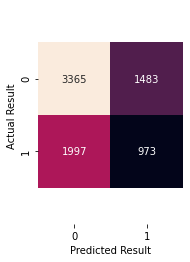

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions=clf.predict(X_test)
mat=confusion_matrix(y_test,predictions)
sns.heatmap(mat,fmt='g',square=True,annot=True,cbar=False)
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
a,b=plt.ylim()
a+=0.5
b-=0.5
plt.ylim(a,b)
plt.show()

In [40]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,predictions))

Accuracy: 0.5548733691481197
